# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import api_keys


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

# OpenWeatherMap API Key
api_key = api_keys.weather_api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"--------------------------------------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
          # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
--------------------------------------------------------------
Processing Record 1 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c61eddd25a92d387eb5ce5ac585e82fb&q=norman wells
Processing Record 2 | Najrān
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c61eddd25a92d387eb5ce5ac585e82fb&q=najran
Processing Record 3 | Diu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c61eddd25a92d387eb5ce5ac585e82fb&q=diu
Processing Record 4 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c61eddd25a92d387eb5ce5ac585e82fb&q=qaanaaq
Processing Record 5 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c61eddd25a92d387eb5ce5ac585e82fb&q=talnakh
Processing Record 6 | Lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c61eddd25a92d387eb5ce5ac585e82fb&q=lagoa
Processing Record 7 | Jamestown
http://api.openweathermap.org/data/2.5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# dict with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# DF from dict
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

In [6]:
# export data to csv

# Save data frame to CSV
weather_data.to_csv('Output_csv/weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Norman Wells,75,CA,1619289776,47,65.2820,-126.8329,33.80,5.75
1,Najrān,75,SA,1619289777,16,17.4924,44.1277,86.00,11.50
2,Diu,100,IN,1619289779,71,20.7141,70.9822,81.30,13.06
3,Qaanaaq,93,GL,1619289780,69,77.4840,-69.3632,27.73,6.49
4,Talnakh,100,RU,1619289781,97,69.4865,88.3972,30.42,13.71


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

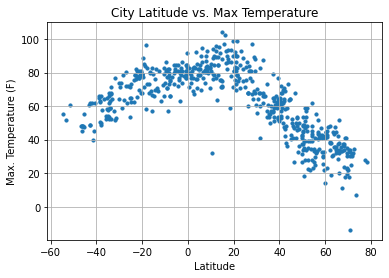

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()


## Latitude vs. Humidity Plot

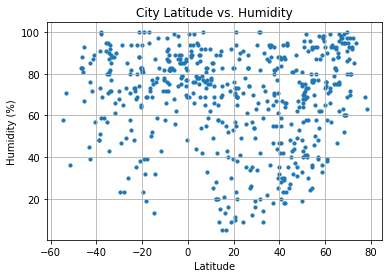

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

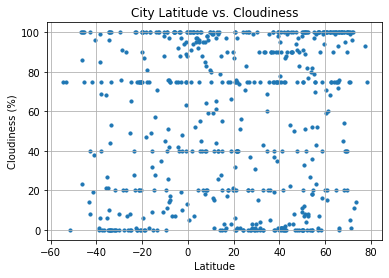

In [11]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()


## Latitude vs. Wind Speed Plot

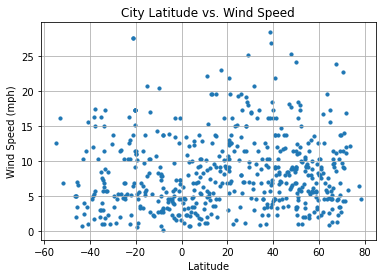

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

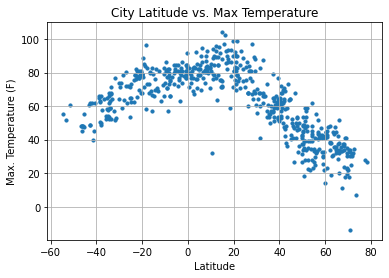

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
north_hemi_df = weather_data.loc[(weather_data['Lat']>0)]
south_hemi_df = weather_data.loc[(weather_data['Lat'] < 0)]

In [15]:
north_hemi_df.count()

City          381
Cloudiness    381
Country       381
Date          381
Humidity      381
Lat           381
Lng           381
Max Temp      381
Wind Speed    381
dtype: int64

In [16]:
south_hemi_df.count()

City          174
Cloudiness    174
Country       174
Date          174
Humidity      174
Lat           174
Lng           174
Max Temp      174
Wind Speed    174
dtype: int64

r-squared: 0.7446990613126454


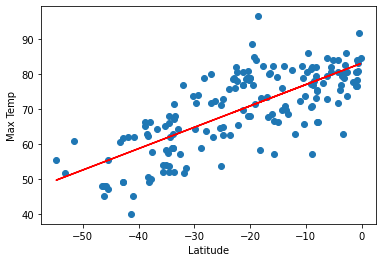

<Figure size 432x288 with 0 Axes>

In [17]:
#define the function to call for each analysis/parameter
def line_regr(x, y,yaxis):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    y_pred = intercept + slope*x
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x,y)
    plt.plot(x,y_pred,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    print(f"r-squared: {rvalue}")
    plt.show()
    
#Plot it out, foo'

x = south_hemi_df['Lat']
y = south_hemi_df['Max Temp']
line_regr(x,y,'Max Temp')

plt.savefig("SH_temp_vs_lat.png")

r-squared: -0.8729977230536641


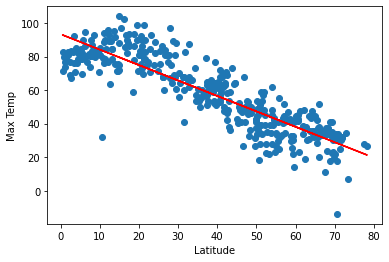

In [18]:
x = north_hemi_df['Lat']
y = north_hemi_df['Max Temp']
line_regr(x,y,'Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.14329014035087964


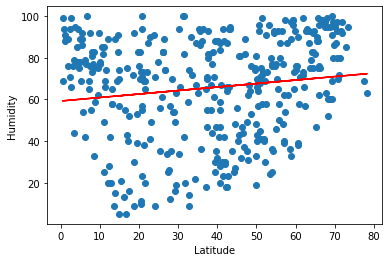

<Figure size 432x288 with 0 Axes>

In [19]:
x = north_hemi_df['Lat']
y = north_hemi_df['Humidity']
line_regr(x,y,'Humidity')

plt.savefig("NH_hum_vs_lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.12326046966728527


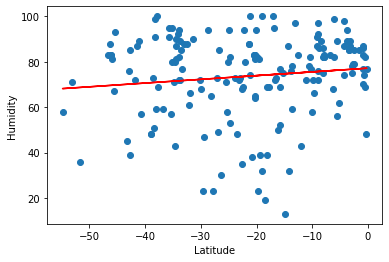

<Figure size 432x288 with 0 Axes>

In [20]:
x = south_hemi_df['Lat']
y = south_hemi_df['Humidity']
line_regr(x,y,'Humidity')

plt.savefig("SH_hum_vs_lat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.07334937769914823


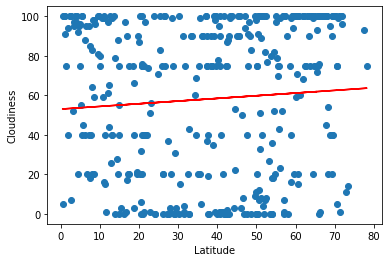

<Figure size 432x288 with 0 Axes>

In [21]:
x = north_hemi_df['Lat']
y = north_hemi_df['Cloudiness']
line_regr(x,y,'Cloudiness')

plt.savefig("NH_cloud_vs_lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.1682016049684506


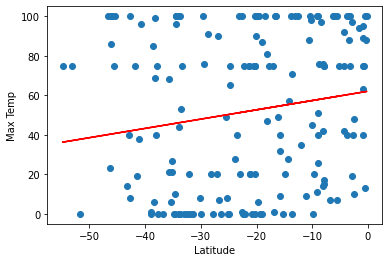

<Figure size 432x288 with 0 Axes>

In [22]:
x = south_hemi_df['Lat']
y = south_hemi_df['Cloudiness']
line_regr(x,y,'Max Temp')

plt.savefig("SH_cloud_vs_lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.01936033926044725


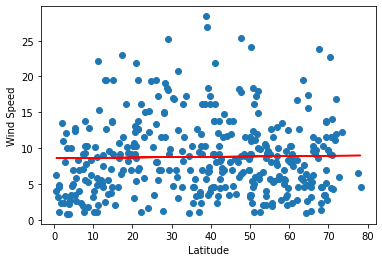

<Figure size 432x288 with 0 Axes>

In [24]:
x = north_hemi_df['Lat']
y = north_hemi_df['Wind Speed']
line_regr(x,y,'Wind Speed')

plt.savefig("NH_ws_vs_lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.03958896271511522


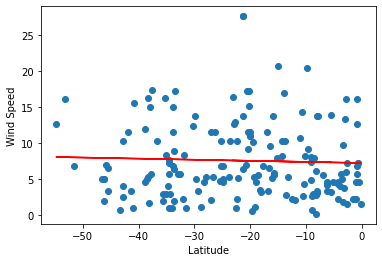

<Figure size 432x288 with 0 Axes>

In [25]:
x = south_hemi_df['Lat']
y = south_hemi_df['Wind Speed']
line_regr(x,y,'Wind Speed')

plt.savefig("NH_ws_vs_lat.png")